# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [1]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
* The smartcab is not at all moving.

* It is getting both negative and positime rewards. It gets a minor positive rewards during redlight, or during green-light with a car nearby. Else, for being stopped at green-light and completely clear road, it gets a big nenative reward.

* Answered in the previous case.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

agent.py
1. num_dummies - It is the number of dummies in the simulation. I guess, dummies mean other cars.
2. grid_size - It is the size of the map, where the smartcab is going to run.
3. update_delay - The delay between consecutive smartcab moves.

environment.py

The method act() is called for the agent to move.

simulator.py

render_text() will show the movements in the command window. And render() function shows it in the pygame gui.

planner.py

the next_waypoint() will consider East-West before looking for North-South direction.

## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simulation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!


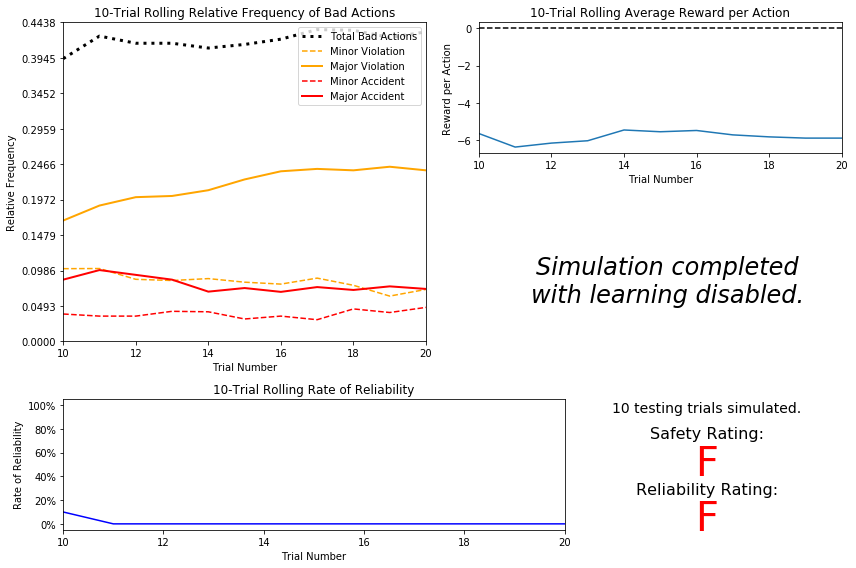

In [2]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
On an average the bad decision count is at around 40% of the time. That is pretty high. And of that around 4% of the time there is a major accident and around 9% of the time there is a minor accident.

I found that the number of Major violation goes up as the number of trials progresses. I don't have a solid explanation for it.

The rewards are consistently negative. They stays at around 6 consistently. There is a slight variation there. But, right now, I don't think that is significant. It does suggest that for all bad decisions are heavily penalized.

The reliability is low as expected. In the beginning it was greater than 0. Then quickly it drops to zero. And based on random movement, it completely makes sense.

As the trials increase the number of major violation slightly increases. But, at this point I don't think it is significant as the movemnets are random.

This smartcab is definitely not safe or reliable. THe F score tells it all.

## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**
Waypoint -> It tell the relative direction the smartcab should take to reach the destination. It is important for the reliability of the smartcab because otherwise it will never reach the destination.

Light -> It is important for the safety of the smartcab. It is important to obey the traffic rules.

Left, Right, Oncoming -> These are important for the safety of the smartcab. Because, even though the lights will tell you the rule, this feature tells if a car is present. And it is important to reach the destination without any accidents.

Deadline -> This feature is important for the reliability. If the smartcab doesn't reach on time, then it is not considered reliable. Hence, one should always keep in mind the number of steps to finish time. (Hindsight: Later, I found that I don't need this feature to solve the smartcab problem.)

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**
Number of possible values:<br>
<br>
Wapoint -> Left, Right, Forward<br>
Light -> Red, Green<br>
Left, Right, Oncoming -> 4 states each (left, right, forward, none)<br>
Deadline -> A number based on what we configure. Let's take 20.<br>
<br>
The total number of states is: 3 x 2 x 4 x 4 x 4 x 20 = 7680<br>
<br>
If the smartcab has to reach the destination before the deadline (that is 20, here), then we are left with 384 completely different states in each step of the trial. It is impossible to be in such a sitnation. My guess is that to completely reach all the 7680 state at least once, we may need at least 7680\*10 = 76800 steps. That is equivalent of 3840 unique trials (only 20 steps to reach the destination). I am putting a multiplier of 10 to access all the states.
<br>
So, I may need 38400 trials to be completely safe and trust that I have reached all the states. I don't think, it is a reasonable nuamber.<br>
<br>
Hindsight: Later, I found that I don't have to use the deadline option in the state. Since, the waypoint is showing me direction to take, it offsets the need to use the deadline. <br>
Hence, the total number of states to cover is: 3 \* 2 \* 2 \* 2^3 = 384<br>
And it is reasonable to cover 384 states in a short duration.

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interactive update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simulation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

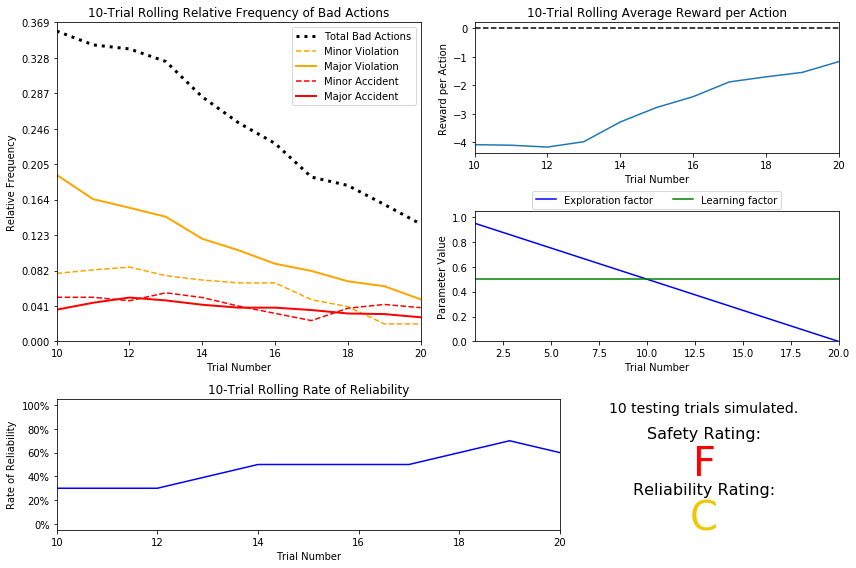

In [3]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**
In the graph showing the relative frequency of the bad action, I see that the "Total Bad Actions" is reducing pretty rapidly. The main contributor for it is Major Violation. Overall, both Minor and Major accidents remain the same or decrease slightly. That is one of the reasons for showing "Safety Rating" as F.

The Rate of Reliability is gradually going upas the number of trials proceed. And it shows in the "C" rating.

The "Reward per Action" remains at -4 for upto 15 trials. But then, it starts improving and it is showing a positive trend.

Based on the decreasing slope of "Bad Actions" and increasing slope of "Reward" and "Reliabilty" I was encouraged to try with a very small epsilon value. That led to 1000 trials and I was able to get A for both Safety and Reliability. But, since in this Question, I am not asked to change epsilon value like that, I am keeping the existing results.

Since, the epsilon was linearly decaying by -0.05, and since the tolerance was 0.05, I had to do approximately 20 trials before testing.

The decaying function of epsilon is showing in the "Parameter Value" graph. The Blue line with a negative slope is that.

From the initial driving agent (with ranodm action), this one has better reliability. But, the safety is still F. But, as the graphs show, the bad actions are decreasing. So, if I choose a lower epsilon decaying rate, I will have more trials and get better results.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning parameters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simulation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

#### Multiple runs and Analysis
I am running a lot of experiments here. All the analysis is there in the end in the form of a table.

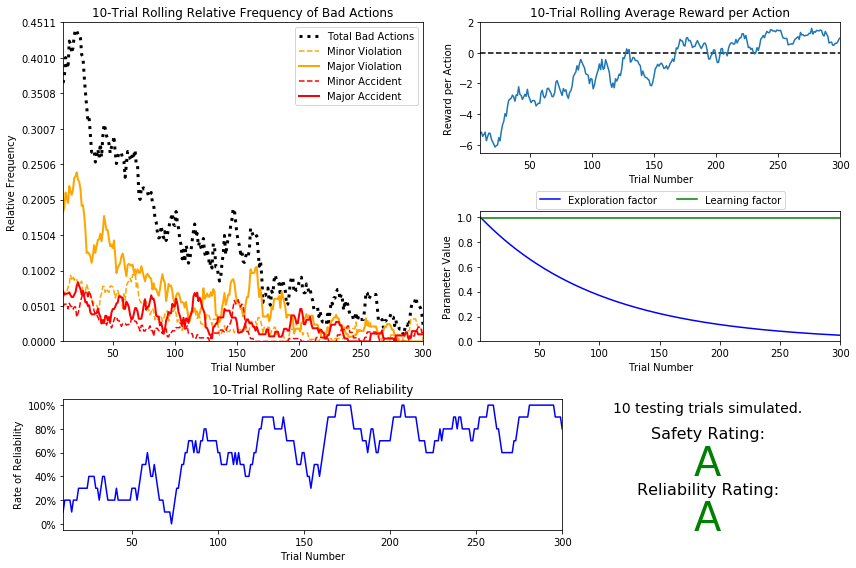

In [5]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# alpha = 0.99
# epsilon = 1.0
# tolerance = 0.05
# epsilon update = pow(alpha, trial_count)
vs.plot_trials('sim_improved-learning.csv')

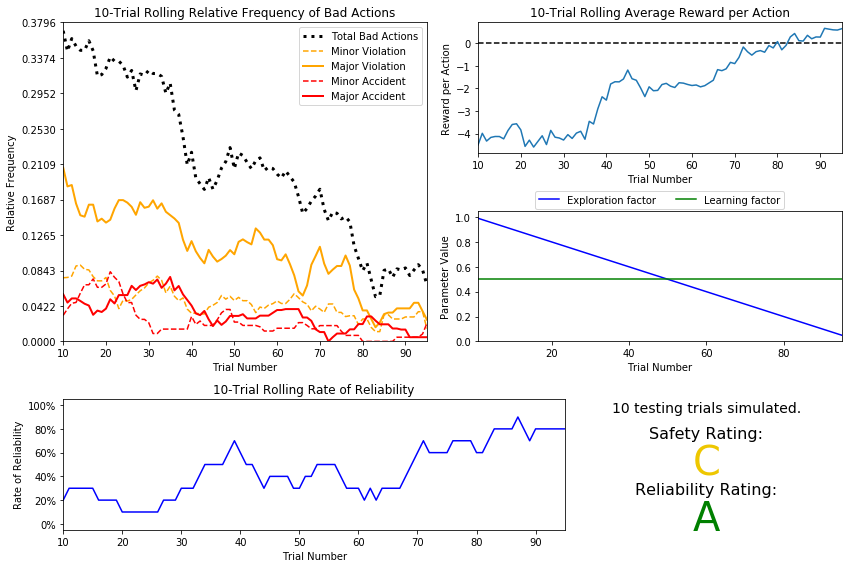

In [7]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# alpha = 0.5
# epsilon = 1.0
# epsilon update = epsilon - 0.01
# tolerance = 0.05
# Linear, slow decay
vs.plot_trials('sim_improved-learning.csv')

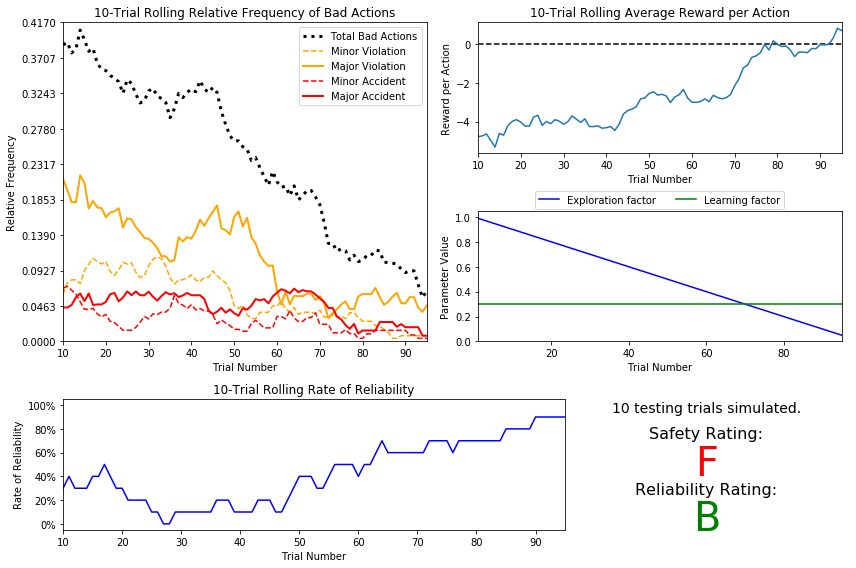

In [8]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# alpha = 0.3
# epsilon = 1.0
# epsilon update = epsilon - 0.01
# tolerance = 0.05
# Starting with a lower alpha. Faster learning.
vs.plot_trials('sim_improved-learning.csv')

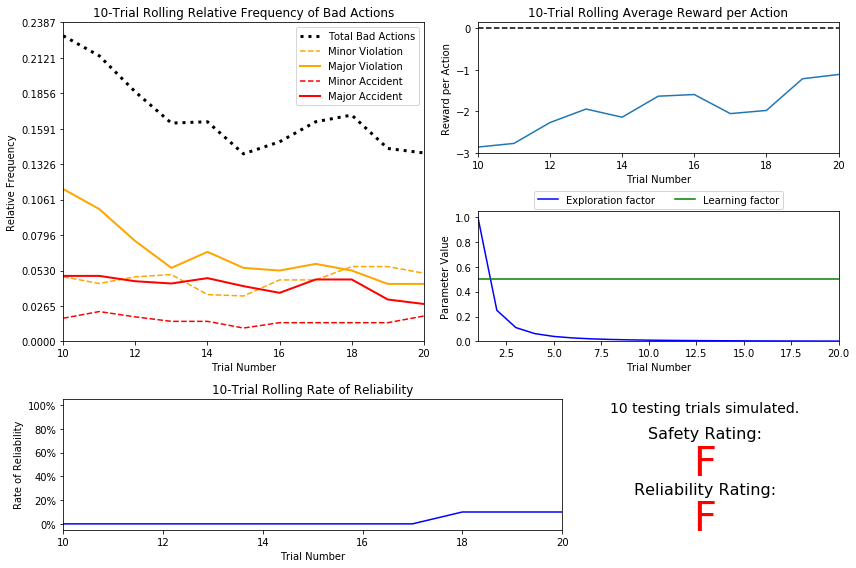

In [9]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# alpha = 0.5
# epsilon = 1.0
# tolerance = 0.05
# epsilon update = (1/t^2)
vs.plot_trials('sim_improved-learning.csv')

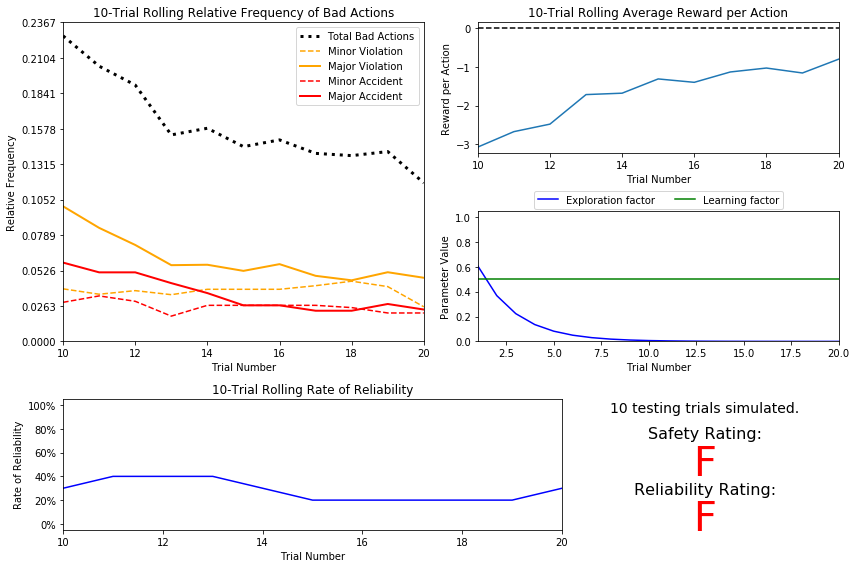

In [10]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# alpha = 0.5
# epsilon = 1.0
# tolerance = 0.05
# epsilon update = Exp(-at)
vs.plot_trials('sim_improved-learning.csv')

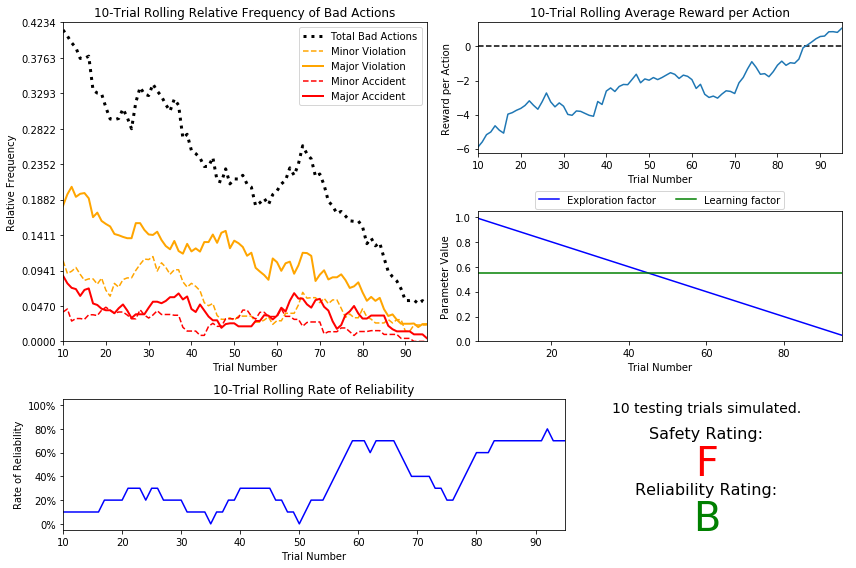

In [11]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# alpha = 0.55
# epsilon = 1.0
# epsilon update = epsilon - 0.01
# tolerance = 0.05
# Linear, slow decay
vs.plot_trials('sim_improved-learning.csv')

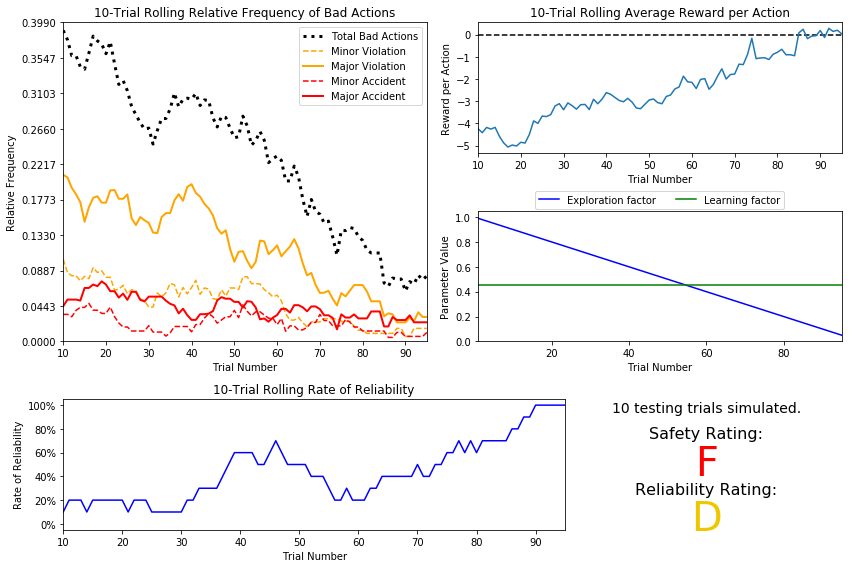

In [12]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# alpha = 0.45
# epsilon = 1.0
# epsilon update = epsilon - 0.01
# tolerance = 0.05
# Linear, slow decay
vs.plot_trials('sim_improved-learning.csv')

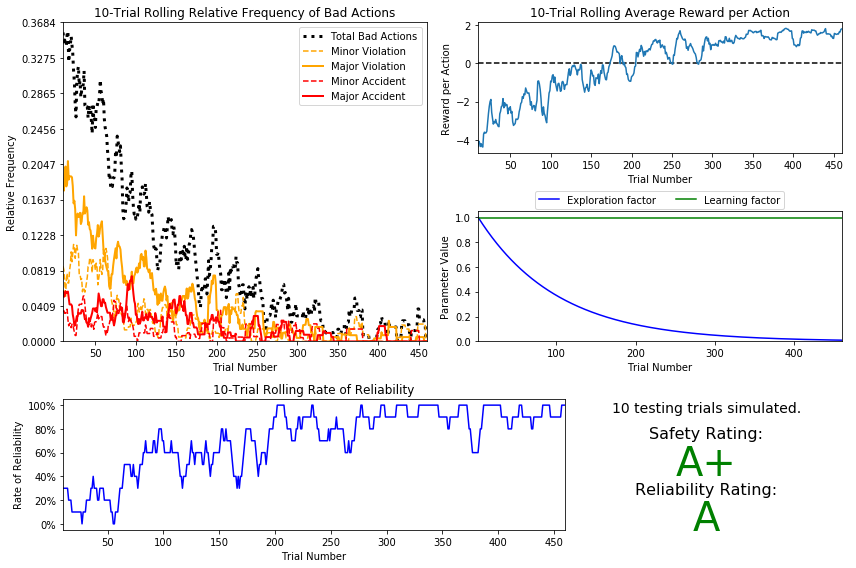

In [20]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# alpha = 0.99
# epsilon = 1.0
# epsilon update = pow(alpha, trial_count)
# tolerance = 0.01
vs.plot_trials('sim_improved-learning.csv')

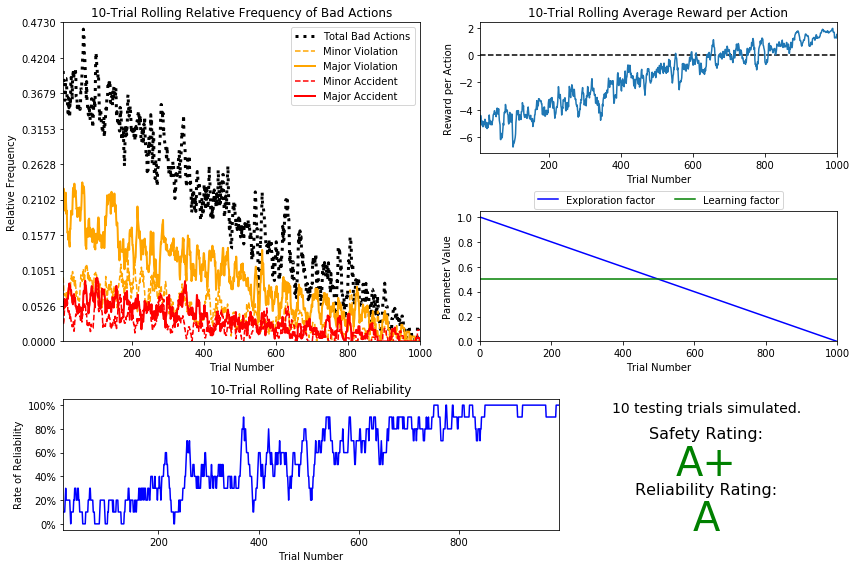

In [21]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# alpha = 0.5
# epsilon = 1.0
# epsilon update = epsilon - 0.001
# tolerance = 0.001
vs.plot_trials('sim_improved-learning.csv')

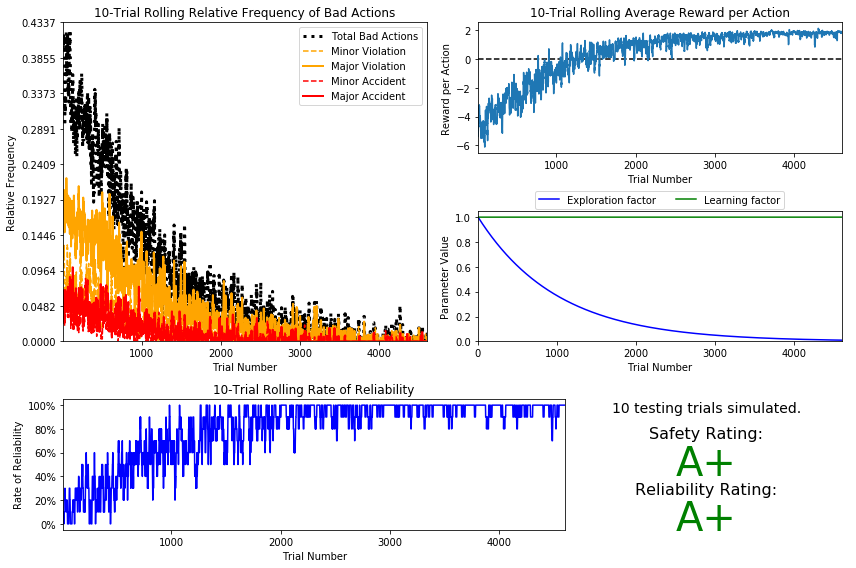

In [4]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# alpha = 0.999
# epsilon = 1.0
# epsilon update = pow(alpha, trial_count)
# tolerance = 0.01
vs.plot_trials('sim_improved-learning.csv')

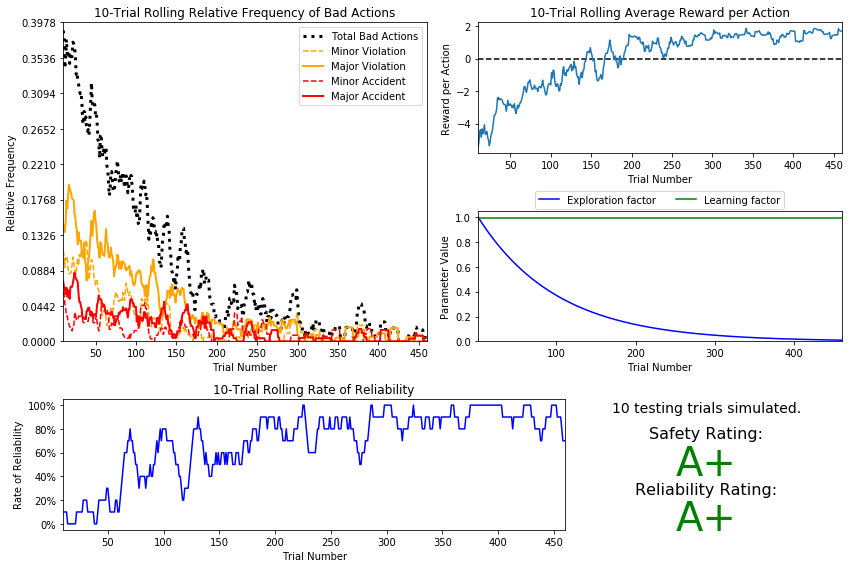

In [11]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
# alpha = 0.99
# epsilon = 1.0
# epsilon update = pow(alpha, trial_count)
# tolerance = 0.01
vs.plot_trials('sim_improved-learning.csv')

In [8]:
tabledata = [
        ["No.", "alpha", "epsilon", "tolerance", "epsilon-update", "Num of Trials", "Safety", "Reliability", "Comment"],
        [ 1, 0.99, 1.0, 0.05, "alpha^t", 300, "A", "A", "Starting alpha = 0.99 gives a very high learning rate. And with epsilon update of alpha^t and a tolerance of 0.05, the number of trials is around 300. The resulting output is good as I get both the safety and reliability rating as A."],
        [ 2, 0.5, 1.0, 0.05, "e-0.01", 100, "C", "A", "alpha = 0.5 gives a medium learning rate. Epsilon is decaying linearly and after around 100 trial it reaches the tolerance. Safety is C and Reliability is A. I don't know the reason why that disparity. As time proceeds, the violations are reducing and rewards are increasing. So, if I had put a lower tolerance or a slower decaying epsilon, I would have got better results."],
        [ 3, 0.3, 1.0, 0.05, "e-0.01", 100, "F", "B", "I reduced the alpha to 0.3 and kept everything the same from Experiment 2. The results are bad. This means, a higher alpha value is desirable."],
        [ 4, 0.5, 1.0, 0.05, "(1/t^2)", 20, "F", "F", "With the extreme rapid epsilon decay, there were not enough trials. So, the results are really bad."],
        [ 5, 0.5, 1.0, 0.05, "exp(-at)", 20, "F", "F", "Again, with the extreme rapid epsilon decay, there were not enough trials. The ratings are F."],
        [ 6, 0.55, 1.0, 0.05, "e-0.01", 100, "F", "B", "Based on the experiment 2 and 3, I am raising the alpha slightly. The result is not promising. Ratings are F and B."],
        [ 7, 0.55, 1.0, 0.05, "e-0.01", 100, "F", "B", "Slightly bringing down the alpha from experiment 6. But the result is F and D. Not good."],
        [ 8, 0.99, 1.0, 0.01, "alpha^t", 460, "A+", "A", "Since, experiment 1 had a very good result, I am modifying it to increase the number of trials by reducing the tolerance. And result is that I got A+ and A, which is an improvemnt"],
        [ 9, 0.5, 1.0, 0.001, "e-0.001", 1000, "A+", "A", "Until now, I saw good results only with alpha=0.99. So, now trying with alpha=0.5 But, playing with tolerance and epsilon update to increase the number of trials. I got 1000 trials and the resuls are good. A+ and A"],
        [ 10, 0.999, 1.0, 0.01, "alpha^t", 4500, "A+", "A+", "Inspired by experiment 8, I am making alpha=0.999. Since, epsilon update is dependant on alpha, it takes way longer to finish. But, I do get the perfect score A+ and A+."],
        [ 11, 0.99, 1.0, 0.01, "alpha^t", 460, "A+", "A+", "So, far experiments 8 and 9 are the best. Though experiment 10 gives A+ and A+, it takes 10 times more. So, running experiment 8 again. And this time I get A+ and A+. Ideally, I should run the whole experiment multiple times and take the average. For now, I am sticking with this."]
        ]

from IPython.display import HTML, display

# Code copied from: https://stackoverflow.com/questions/35160256/how-do-i-output-lists-as-a-table-in-jupyter-notebook
display(HTML(
   '<table border="1"><tr>{}</tr></table>'.format(
       '</tr><tr>'.join(
           '<td>{}</td>'.format('</td><td>'.join(str(_) for _ in row)) for row in tabledata)
       )
))

No.,alpha,epsilon,tolerance,epsilon-update,Num of Trials,Safety,Reliability,Comment
1,0.99,1.0,0.05,alpha^t,300,A,A,"Starting alpha = 0.99 gives a very high learning rate. And with epsilon update of alpha^t and a tolerance of 0.05, the number of trials is around 300. The resulting output is good as I get both the safety and reliability rating as A."
2,0.5,1.0,0.05,e-0.01,100,C,A,"alpha = 0.5 gives a medium learning rate. Epsilon is decaying linearly and after around 100 trial it reaches the tolerance. Safety is C and Reliability is A. I don't know the reason why that disparity. As time proceeds, the violations are reducing and rewards are increasing. So, if I had put a lower tolerance or a slower decaying epsilon, I would have got better results."
3,0.3,1.0,0.05,e-0.01,100,F,B,"I reduced the alpha to 0.3 and kept everything the same from Experiment 2. The results are bad. This means, a higher alpha value is desirable."
4,0.5,1.0,0.05,(1/t^2),20,F,F,"With the extreme rapid epsilon decay, there were not enough trials. So, the results are really bad."
5,0.5,1.0,0.05,exp(-at),20,F,F,"Again, with the extreme rapid epsilon decay, there were not enough trials. The ratings are F."
6,0.55,1.0,0.05,e-0.01,100,F,B,"Based on the experiment 2 and 3, I am raising the alpha slightly. The result is not promising. Ratings are F and B."
7,0.55,1.0,0.05,e-0.01,100,F,B,Slightly bringing down the alpha from experiment 6. But the result is F and D. Not good.
8,0.99,1.0,0.01,alpha^t,460,A+,A,"Since, experiment 1 had a very good result, I am modifying it to increase the number of trials by reducing the tolerance. And result is that I got A+ and A, which is an improvemnt"
9,0.5,1.0,0.001,e-0.001,1000,A+,A,"Until now, I saw good results only with alpha=0.99. So, now trying with alpha=0.5 But, playing with tolerance and epsilon update to increase the number of trials. I got 1000 trials and the resuls are good. A+ and A"
10,0.999,1.0,0.01,alpha^t,4500,A+,A+,"Inspired by experiment 8, I am making alpha=0.999. Since, epsilon update is dependant on alpha, it takes way longer to finish. But, I do get the perfect score A+ and A+."


### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before beginning testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**
The decaying function (epsilon update), I used is the alpha^t. I tried linear decay and (1/t^2). Basically, in the end, I found that decaying function is used to control when the agent starts testing. So, I really didn't matter, what decaying function I picked (in this case). If I could give enough trials, it was ok.

Around 460 trials were needed before testing.

I used epsilon-tolerance of 0.01 and alpha of 0.99. My thought process behind those numbers were noted in the previous table where I experimented with various values.

Default learner had ratings F and C. Here, I got A+ and A+. Hence, the improvment is big.

The Q-learner has defintely learned the appropriate policy.

And I am satisfied with the safety and reliability ratings are both are A+.

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 
NOTE 1: One important point I noted is that a lot of Q-values are exactly 0.0. That means, those states are not explored enough.

NOTE 2: Before picking 10 random states, I am going to pick a state for turning left at a green with oncoming traffic. That was suggested in my review.

('left', {'light': 'green', 'oncoming': 'forward', 'right': None, 'left': 'left'})
 -- forward : -0.12
 -- right : -0.35
 -- None : -4.89
 -- left : -20.8
* Q-value based action: Forward
* My prediction is: None
* Analysis: It hasn't learnt about yield yet. But, in real life, I would wait in the signal till the traffic is gone and then I take the left. In this simulation there is no option to wait and go later. So, I guess, it is good that it decided to go forward. It has learnt something I didn't think of. If my action is None assuming, I will wait for next signal, what happens if there is oncoming traffic in next signal? Hence, a decision to move forwards seems a good approach. But again, what if it keeps on encountering oncoming traffic? Will it keep on going straight and away from the destination?

=====================================================

Picking 10 random states.
And showing my predictions.
Showing analysis only for the first two.

('forward', {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'right'})
* Have to go forward.
* The signal is red.
* The optimal policy is STOP.
* So, my prediction is: None

('left', {'light': 'green', 'oncoming': 'left', 'right': 'forward', 'left': 'forward'})
* Have to go left.
* The signal is green.
* The oncoming car is about to turn left. Since left turn is "yield", that car won't block us. And we can go.
* The right-car is going forward. But, we have green. So, that car must have red signal. We can go.
* The left-car is going forward. But, we have green. So, that car must have red signal. We can go.
* So, my prediction is: turn Left

('forward', {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'})
* My prediction: None

('left', {'light': 'red', 'oncoming': 'forward', 'right': 'forward', 'left': 'left'})
* My prediction: None

('forward', {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': 'forward'})
* My prediction: None

('forward', {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': None})
* My prediction: None

('right', {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': None})
* My prediction: Right

('forward', {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': 'right'})
* My prediction: Forward

('right', {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'})
* My prediction: None

('right', {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': 'forward'})
* My prediction: None

=========================================================================================================

Now compare my prediction with the sim_improved-learning.txt file.
('forward', {'light': 'red', 'oncoming': 'left', 'right': None, 'left': 'right'})
* Q-value:
 -- forward : -9.03
 -- right : 0.00
 -- None : 2.40
 -- left : -9.51
* Q-value based action: None
* My prediction is: None
* Analysis: It agrees my prediction. Also, interesting to note that it gives negative Q-value for forward and left as they would cause accident. And gives a 0.00 to right turn. Which means, it is ok to turn right without incurring any penalty (accident, in this case). 

('left', {'light': 'green', 'oncoming': 'left', 'right': 'forward', 'left': 'forward'})
* Q-value:
 -- forward : 0.00
 -- right : 1.83
 -- None : 0.00
 -- left : 0.0
* Q-value based action: Right
* My prediction is: Left
* Analysis: Very counter-intuitive. It is green for me and hence the left and right cars won't move. The oncoming car is also taking left. So, we both could have gone. But, the Q-value suggest to take right. Also, note that there is no negative score for any turn. That is because, we have green signal.

('forward', {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'})
* Q-value:
 -- forward : 0.00
 -- right : 0.00
 -- None : 1.24
 -- left : 0.0
* Q-value based action: None
* My prediction: None
* Analysis: Values matched.

('left', {'light': 'red', 'oncoming': 'forward', 'right': 'forward', 'left': 'left'})
* Q-value:
 -- forward : 0.00
 -- right : 0.00
 -- None : 1.95
 -- left : 0.0
* Q-value based action: None
* My prediction: None
* Analysis: As predicted

('forward', {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': 'forward'})
* Q-value:
 -- forward : -39.61
 -- right : -19.64
 -- None : 2.73
 -- left : 0.0
* Q-value based action: None
* My prediction: None
* Analysis: As predicted. Look at the high negative for forward. That is because, the signal is red. Right turn is also high negative as it could cause accident. It is surprising to see Left-turn as 0 value. In this case, left-turn is both illegal and will cause accident.

('forward', {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': None})
* Q-value:
 -- forward : 0.00
 -- right : -0.12
 -- None : 2.72
 -- left : 0.0
* Q-value based action: None
* My prediction: None
* Analysis: As predicted.

('right', {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': None})
* Q-value:
 -- forward : 0.00
 -- right : 2.79
 -- None : -0.00
 -- left : 0.45
* Q-value based action: Right
* My prediction: Right
* Analysis: As predicted. Light is green and we have to take right. So, that is the correct action to take.

('forward', {'light': 'green', 'oncoming': 'left', 'right': 'right', 'left': 'right'})
* Q-value:
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.00
 -- left : 0.7
* Q-value based action: Left
* My prediction: Forward
* Analysis: My prediction is different. We have green signal and we have to go forward. But, looks like, the Q-learner thinks we will have accident with the oncoming car, which is taking left turn. I think, the learner has not learnt that left-on-green is yield.

('right', {'light': 'red', 'oncoming': 'forward', 'right': None, 'left': 'forward'})
* Q-value:
 -- forward : 0.00
 -- right : 0.00
 -- None : 0.42
 -- left : -39.2
* Q-value based action: None
* My prediction: None
* Analysis: Light is red. And the left car is going forward. So, we can't move. The learner predicted correct.

('right', {'light': 'red', 'oncoming': 'forward', 'right': 'left', 'left': 'forward'})
* Q-value:
 -- forward : 0.00
 -- right : 0.00
 -- None : 1.51
 -- left : 0.0
* Q-value based action: None
* My prediction: None
* Analysis: As predicted.

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**
In this case, the goal is not very clear. The state specifies which direction should the smartcab go to reach the destination. But, it doesn't tell if how far it is or the exact location. At every point the smartcab is getting its new direction. Hence, at any point, it doesn't know the future turn that is supposed to be taken. For that to work, we should remove the next-turn from the state, and instead have the destination as a geographical coordinate.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.